# Even / Odd training empiar 11415
N2N (Noise2Noise) denoising del volumen empiar11415. Utiliza 2 volúmenes $V_1$ y $V_2$, donde $V_1$ es el volumen formado por los slices Z pares "even" y $V_2$ es el volumen formado por los slices Z impares "odd".

Todos los ficheros temporales se crean en `/nas/vruiz/cryoCARE/empiar11415`.

In [1]:
# %pip install tensorflow==2.4

## Creamos $V_1$ y $V_2$

In [2]:
%run split_even_odd.ipynb

noisy.shape=(59, 2048, 2660)
Writing even.mrc
even.shape=(33, 2048, 2660)
Writing odd.mrc
odd.shape=(33, 2048, 2660)


## Configuramos cryoCARE

In [3]:
%%writefile train_data_config__evenodd.json
{
    "even": ["even.mrc"],
    "odd": ["odd.mrc"],
    "mask": [""],
    "patch_shape": [16, 16, 16],
    "num_slices": 360,
    "split": 0.9,
    "tilt_axis": "Y",
    "n_normalization_samples": 200,
    "path": "./even_odd_data",
    "overwrite": "True"  
}

Writing train_data_config__evenodd.json


In [4]:
%%bash
#cd /nas/vruiz/cryoCARE/empiar11415
source ~/envs/cryoCARE/bin/activate
cryoCARE_extract_train_data.py --conf train_data_config__evenodd.json

2025-10-29 19:32:26.929160: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


even.data.shape=(33, 2048, 2660), sample_shape=[16, 16, 16]
Computing normalization parameters:


100%|██████████| 200/200 [00:00<00:00, 2596.43it/s]


## Entrenamos

In [5]:
%%writefile train_config__evenodd.json
{
  "train_data": "./even_odd_data",
  "epochs": 50,
  "steps_per_epoch": 200,
  "batch_size": 16,
  "unet_kern_size": 3,
  "unet_n_depth": 3,
  "unet_n_first": 16,
  "learning_rate": 0.0004,
  "model_name": "model",
  "path": "./",
  "gpu_id": [1]
}

Writing train_config__evenodd.json


In [6]:
%%bash
#cd /nas/vruiz/cryoCARE/empiar11415
source ~/envs/cryoCARE/bin/activate
cryoCARE_train.py --conf train_config__evenodd.json

2025-10-29 19:32:32.532132: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2025-10-29 19:32:34.090897: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-10-29 19:32:34.091636: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-10-29 19:32:34.115892: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-29 19:32:34.117907: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: NVIDIA A30 computeCapability: 8.0
coreClock: 1.44GHz coreCount: 56 deviceMemorySize: 23.60GiB deviceMemoryBandwidth: 869.04GiB/s
2025-10-29 19:32:34.117976: I tensorflow/stream_executor/cuda/cuda_gpu_executor.c

Looking for GPU with ID: 1
GPU 1 successfully found
0 1
1 16
2 16
3 16
4 1
Epoch 1/50


2025-10-29 19:32:37.814952: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2025-10-29 19:32:39.184597: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2025-10-29 19:32:39.269413: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2025-10-29 19:32:40.257482: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2025-10-29 19:32:40.553938: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2025-10-29 19:33:13.286550: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:656] In AUTO-mode, and switching to DATA-based sharding, instead of FILE-based sharding 

200/200 [==============================] - 54s 100ms/step - loss: 0.6714 - mse: 0.6714 - mae: 0.6283 - val_loss: 0.7364 - val_mse: 0.7364 - val_mae: 0.6367
Epoch 2/50
200/200 [==============================] - 3s 17ms/step - loss: 0.5265 - mse: 0.5265 - mae: 0.5583 - val_loss: 0.7003 - val_mse: 0.7003 - val_mae: 0.6247
Epoch 3/50
200/200 [==============================] - 3s 17ms/step - loss: 0.5114 - mse: 0.5114 - mae: 0.5506 - val_loss: 0.6730 - val_mse: 0.6730 - val_mae: 0.6102
Epoch 4/50
200/200 [==============================] - 4s 18ms/step - loss: 0.5003 - mse: 0.5003 - mae: 0.5443 - val_loss: 0.7145 - val_mse: 0.7145 - val_mae: 0.6172
Epoch 5/50
200/200 [==============================] - 4s 18ms/step - loss: 0.4934 - mse: 0.4934 - mae: 0.5415 - val_loss: 0.6960 - val_mse: 0.6960 - val_mae: 0.6184
Epoch 6/50
200/200 [==============================] - 3s 17ms/step - loss: 0.4940 - mse: 0.4940 - mae: 0.5416 - val_loss: 0.6986 - val_mse: 0.6986 - val_mae: 0.6136
Epoch 7/50
200/200 

## Inferimos

In [15]:
%%bash
ln -sf /nas/vruiz/vols/empiar11415.mrc .

In [26]:
%%writefile predict_config__evenodd.json
{
    "path": "./model.tar.gz",
    "even": ["empiar11415.mrc"], 
    "odd": ["empiar11415.mrc"],
    "n_tiles": [1,2,2],
    "output": "even_odd_denoised",
    "overwrite": "True",
    "gpu_id": [1]
}

Writing predict_config__evenodd.json


In [27]:
%%bash
#cd /nas/vruiz/cryoCARE/empiar11415
pwd
source ~/envs/cryoCARE/bin/activate
cryoCARE_predict.py --conf predict_config__evenodd.json || true

/nas/vruiz/repos/denoising/docs/Noise2Noise/cryoCARE/empiar11415


2025-10-29 19:47:16.790212: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2025-10-29 19:47:21.986977: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-10-29 19:47:21.988159: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-10-29 19:47:22.017289: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-29 19:47:22.019298: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: NVIDIA A30 computeCapability: 8.0
coreClock: 1.44GHz coreCount: 56 deviceMemorySize: 23.60GiB deviceMemoryBandwidth: 869.04GiB/s
2025-10-29 19:47:22.019371: I tensorflow/stream_executor/cuda/cuda_gpu_executor.c

Looking for GPU with ID: 1
GPU 1 successfully found
Loading network weights from 'weights_best.h5'.
(56, 2048, 2664, 1)
Out of memory, retrying with n_tiles = (1, 2, 4, 1)


100%|██████████| 8/8 [00:24<00:00,  3.00s/it]    


['NEWSTACK: Images copied                                  3-Oct-25  17:07:14     '
 'mpleResistance=\r\n\x00Fieldsize=2.072e-005\r\nVerFieldsize=1.38133e-005\r\nAverage=0\r\nIn'
 'egrate=1\r\nFrameTime=51.1672\r\n\r\n[EScan]\r\nScan=\x00\x00\x00\x00\x00\x00\x00\x00OInterna\x00\x00\x00\x00\x00\x00\x00\x00Oe\r\nDwell=5'
 '-007\r\nPixelWidth=6.74479e-009\r\nPixelHeight=6.74479e-009\r\nHorFieldsize=2.072e-005'
 '\nVerFieldsize=1.38133e-005\r\nFrameTime=51.1672\r\nLineTime=0.024984\r\nMainslock=Off\r'
 'LineIntegration=16\r\nScanInterlacing=1\r\n\r\n[Stage]\r\nStageX=0.00371587\r\nStageY=0.00'
 '293\r\nStageZ=0.00403778\r\nStageR=-1.22169\r\nStageT=0.122173\r\nStageTb=0\r\nSpecTilt=\r\n'
 'orkingDistance=0.00403779\r\nActiveStage=Bulk\r\n\r\n[Image]\r\nDigitalContrast=1\r\nDigit'
 'cryoCARE                                                29-Oct-25  19:49:21     '
 '']


In [28]:
import mrcfile
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [29]:
def read_MRC(path_file):
    return mrcfile.read(mrc_file_path)

In [30]:
mrc_file_path = '/nas/vruiz/vols/empiar11415.mrc'
original_volume = read_MRC(mrc_file_path)

In [31]:
original_volume.shape

(59, 2048, 2660)

In [32]:
mrc_file_path = 'even_odd_denoised/empiar11415.mrc'
denoised_volume = read_MRC(mrc_file_path)

In [33]:
denoised_volume.shape

(59, 2048, 2660)

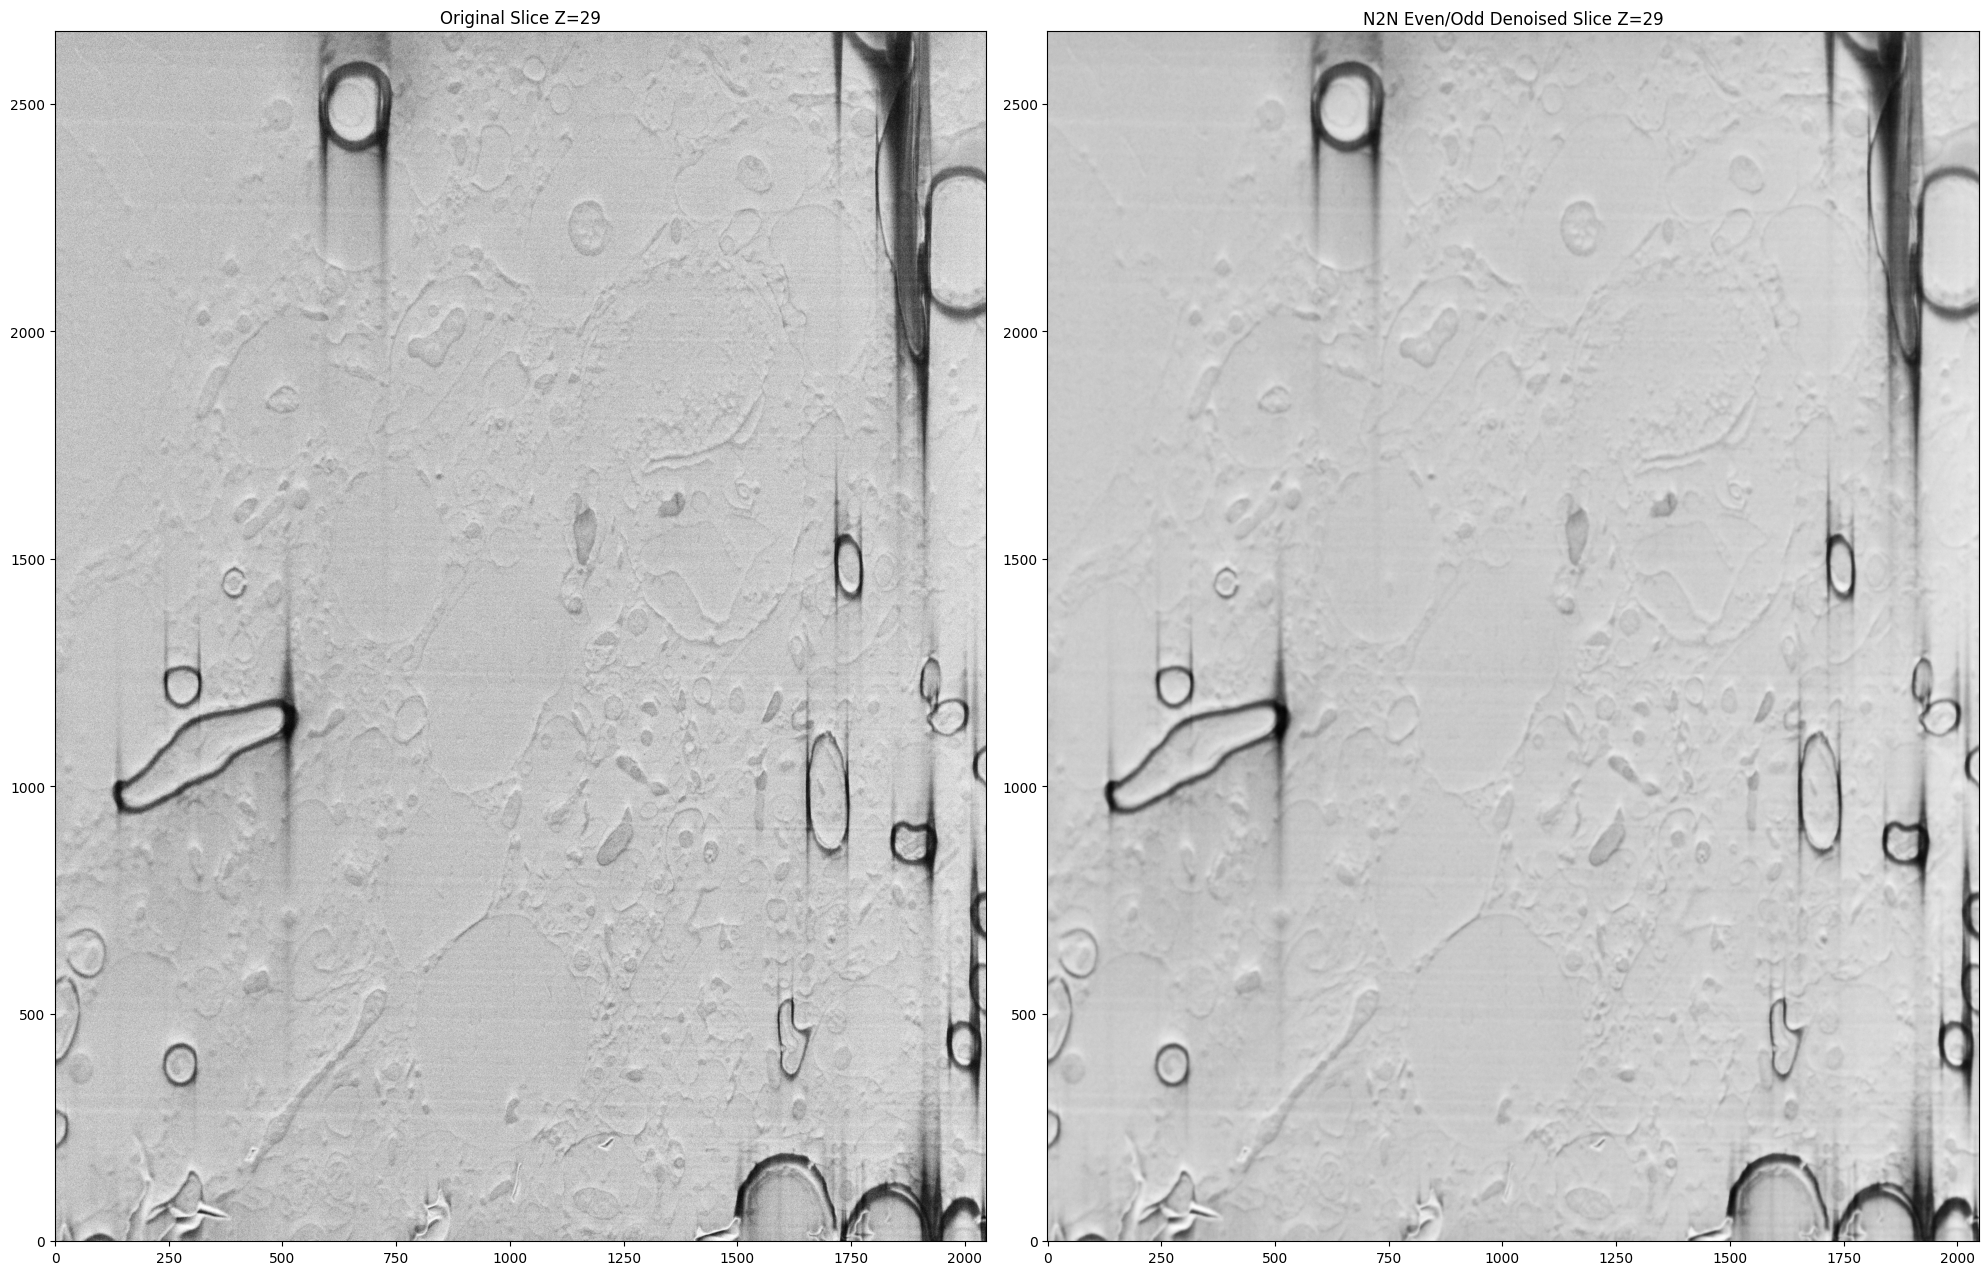

In [34]:
# Choose a slice index in the middle of the volume for a good comparison
slice_idx = original_volume.shape[0] // 2

fig, axes = plt.subplots(1, 2, figsize=(20, 20))

# Plot the original slice z
im1 = axes[0].imshow(original_volume[slice_idx, :, :].T, cmap='gray', origin='lower')
axes[0].set_title(f'Original Slice Z={slice_idx}')
axes[0].grid(False)

# Plot the original slice z+1
im2 = axes[1].imshow(denoised_volume[slice_idx, :, :].T, cmap='gray', origin='lower')
axes[1].set_title(f'N2N Even/Odd Denoised Slice Z={slice_idx}')
axes[1].grid(False)

plt.tight_layout()
plt.show()

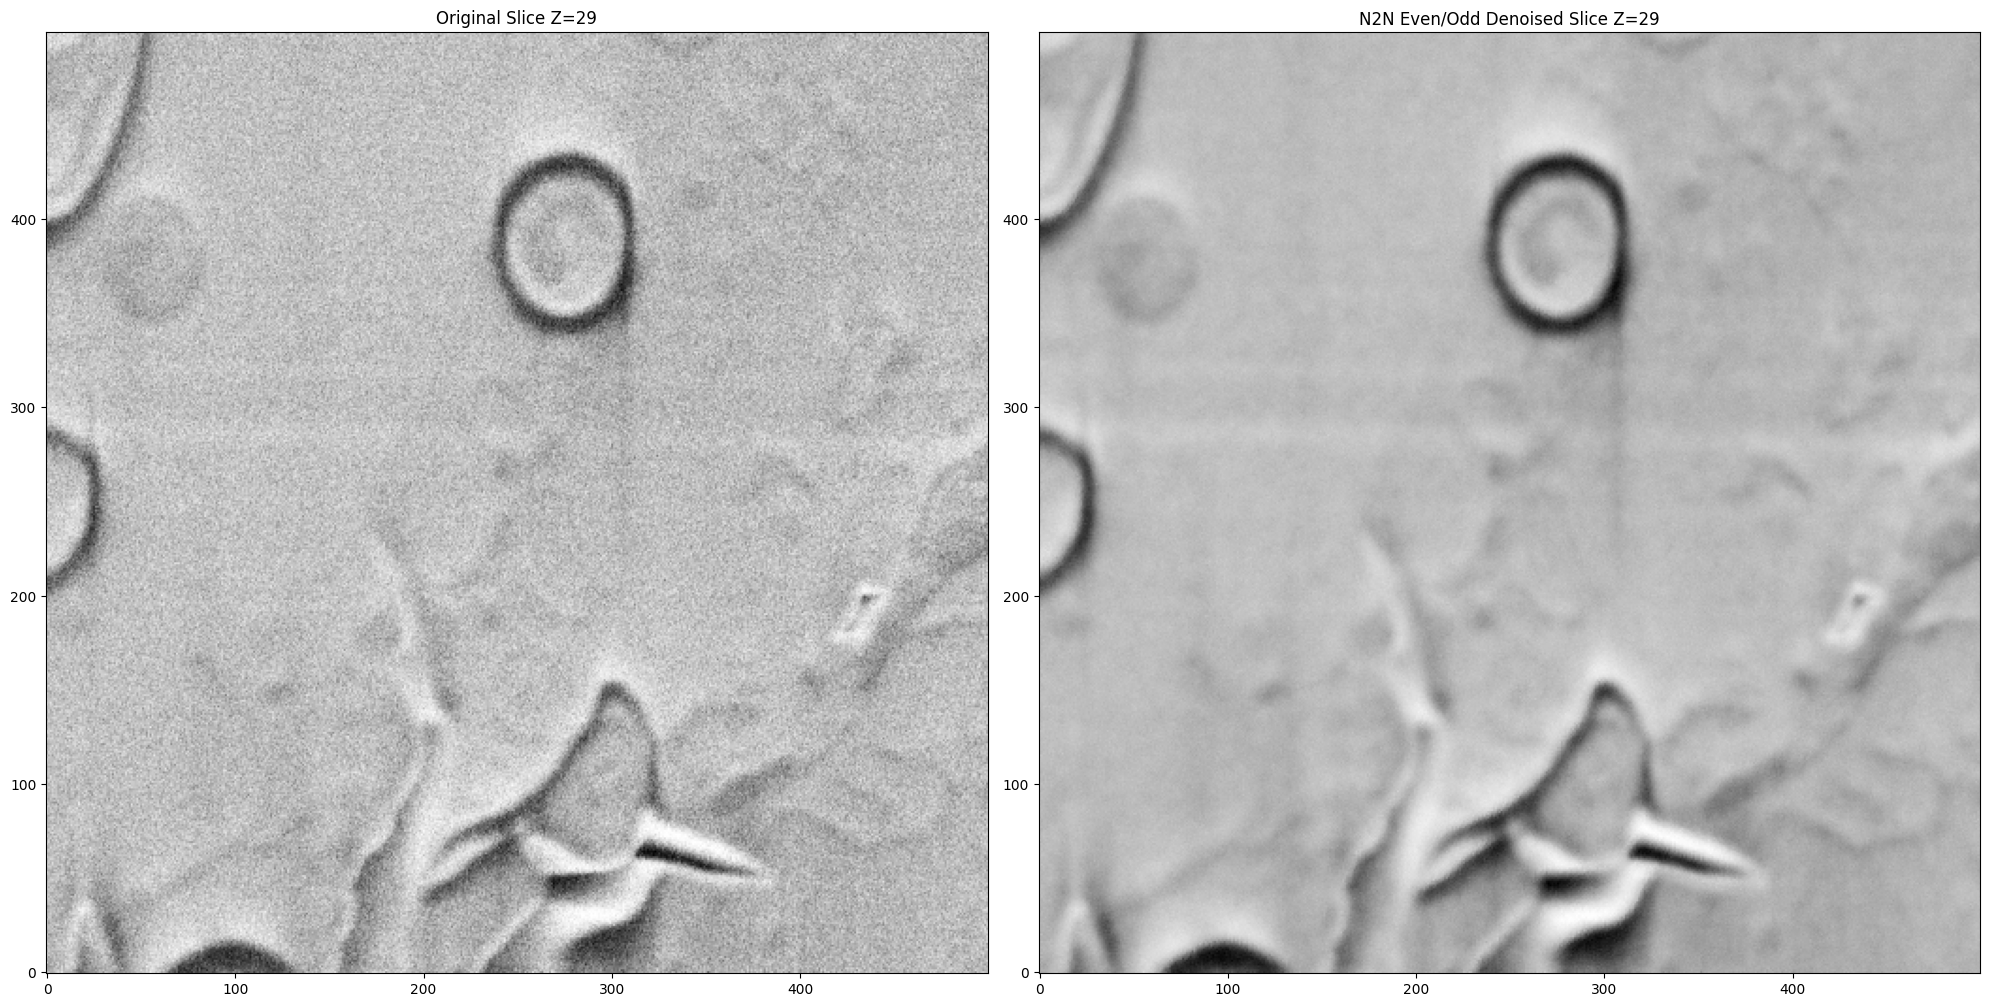

In [48]:
# Choose a slice index in the middle of the volume for a good comparison
slice_idx = original_volume.shape[0] // 2

fig, axes = plt.subplots(1, 2, figsize=(20, 20))

# Plot the original slice z
im1 = axes[0].imshow(original_volume[slice_idx, 0:500, 0:500].T, cmap='gray', origin='lower')
axes[0].set_title(f'Original Slice Z={slice_idx}')
axes[0].grid(False)

# Plot the original slice z+1
im2 = axes[1].imshow(denoised_volume[slice_idx, 0:500, 0:500].T, cmap='gray', origin='lower')
axes[1].set_title(f'N2N Even/Odd Denoised Slice Z={slice_idx}')
axes[1].grid(False)

plt.tight_layout()
plt.show()

In [35]:
%pip install "self_fourier_shell_correlation @ git+https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation"

  Cloning https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation to /tmp/pip-install-m7mb1v8e/self-fourier-shell-correlation_7892d827a1ba402981fb6db405c2edc8
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation /tmp/pip-install-m7mb1v8e/self-fourier-shell-correlation_7892d827a1ba402981fb6db405c2edc8
  Resolved https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation to commit f785ed2aa883d5362036cc66d26498286c9a48ff
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [36]:
%pip show self_fourier_shell_correlation

Name: self_fourier_shell_correlation
Version: 0.0.1
Summary: Self Fourier shell correlation (https://www.nature.com/articles/s42003-023-05724-y)
Home-page: https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation
Author: 
Author-email: "Eric J. Verbeke" <ev9102@princeton.edu>, Vicente González Ruiz <vicente.gonzalez.ruiz@gmail.com>
License: 
Location: /nas/vruiz/envs/cryoCARE/lib/python3.8/site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [37]:
import sys
print(sys.executable)

/home/jupyter-vruiz/envs/cryoCARE/bin/python


In [38]:
%pip install "shuffling @ git+https://github.com/vicente-gonzalez-ruiz/shuffling"

  Cloning https://github.com/vicente-gonzalez-ruiz/shuffling to /tmp/pip-install-i2xc247j/shuffling_77dd3358965943c7a123d45cc53b1320
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/shuffling /tmp/pip-install-i2xc247j/shuffling_77dd3358965943c7a123d45cc53b1320
  Resolved https://github.com/vicente-gonzalez-ruiz/shuffling to commit 0710ed80bd40725b8fd116352c8e58a97f96528b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [39]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [40]:
%pip install "motion_estimation @ git+https://github.com/vicente-gonzalez-ruiz/motion_estimation"

  Cloning https://github.com/vicente-gonzalez-ruiz/motion_estimation to /tmp/pip-install-58yjglou/motion-estimation_d56137654c684f6fa769696e12356c12
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/motion_estimation /tmp/pip-install-58yjglou/motion-estimation_d56137654c684f6fa769696e12356c12
  Resolved https://github.com/vicente-gonzalez-ruiz/motion_estimation to commit e1d376ff0e6461bb01349b5b2d5bd5a39d66acf8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [41]:
from self_fourier_shell_correlation import fsc_utils as fsc

In [42]:
import mrcfile

In [43]:
import matplotlib.pyplot as plt

In [44]:
even = mrcfile.read("even.mrc")

In [45]:
odd = mrcfile.read("odd.mrc")

In [46]:
spatial_freq, fsc_values = fsc.fourier_shell_correlation(even, odd, shell_thickness=0.01)

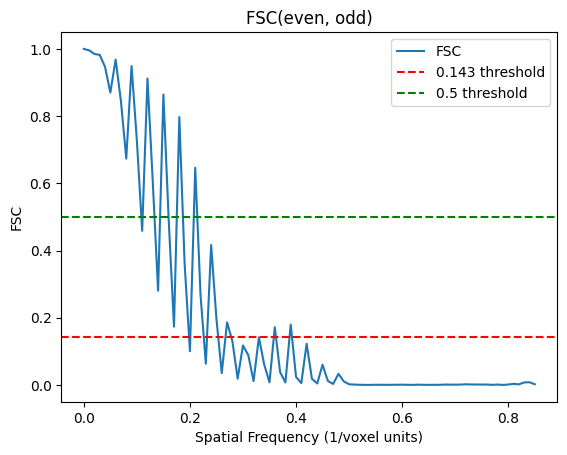

In [47]:
fsc.plot_fsc(spatial_freq, fsc_values, "Spatial Frequency (1/voxel units)", "FSC", "FSC(even, odd)")